In [0]:
from google.colab import drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd


In [0]:
df='/content/drive/My Drive/fer2013.csv'

In [0]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
import tensorflow

In [3]:
import keras

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization


In [0]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.python.keras import utils

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
  

In [0]:
config = tensorflow.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tensorflow.Session(config=config) 
keras.backend.set_session(sess)

In [0]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 25

In [32]:
with open("/content/drive/My Drive/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

number of instances:  35888
instance length:  2304


In [0]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

#x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
#x_train = x_train.astype('float32')
#x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
#x_test = x_test.astype('float32')

#rint(x_train.shape[0], 'train samples')
#rint(x_test.shape[0], 'test samples')

In [0]:
from keras import backend as K
from keras.applications.resnet50 import ResNet50
model = Sequential()

if K.image_data_format=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1,48,48)
    x_test = x_test.reshape(x_test.shape[0], 1,48,48)
    input_shape = (1,img_cols,img_rows)
else:
    x_train = x_train.reshape(x_train.shape[0],48,48,1)
    x_test = x_test.reshape(x_test.shape[0],48,48,1)
    input_shape = (48,48,1)
model.add(Conv2D(32,(3, 3), input_shape = input_shape, activation="relu"))

In [0]:
from tensorflow.keras.layers import AveragePooling2D
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)



In [0]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [38]:
fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5')
  

Epoch 1/25
256/256 [==============================] - 46s 178ms/step - loss: 1.6790 - acc: 0.3228
Epoch 2/25
256/256 [==============================] - 44s 173ms/step - loss: 1.3022 - acc: 0.4982
Epoch 3/25
256/256 [==============================] - 44s 173ms/step - loss: 1.0714 - acc: 0.5934
Epoch 4/25
256/256 [==============================] - 44s 173ms/step - loss: 0.8293 - acc: 0.6939
Epoch 5/25
256/256 [==============================] - 44s 172ms/step - loss: 0.5515 - acc: 0.7987
Epoch 6/25
256/256 [==============================] - 44s 172ms/step - loss: 0.3539 - acc: 0.8742
Epoch 7/25
256/256 [==============================] - 44s 173ms/step - loss: 0.2247 - acc: 0.9224
Epoch 8/25
256/256 [==============================] - 44s 173ms/step - loss: 0.1667 - acc: 0.9422
Epoch 9/25
256/256 [==============================] - 45s 174ms/step - loss: 0.1228 - acc: 0.9585
Epoch 10/25
256/256 [==============================] - 44s 174ms/step - loss: 0.0962 - acc: 0.9679
Epoch 11/25
256/256

In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [0]:
model.save('model25.h5')

In [41]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.011972148066952076
Train accuracy: 99.60291385650635
Test loss: 3.282672365384701
Test accuracy: 59.93313193321228


In [0]:
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import load_model

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
     model = load_model('model25.h5')

In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


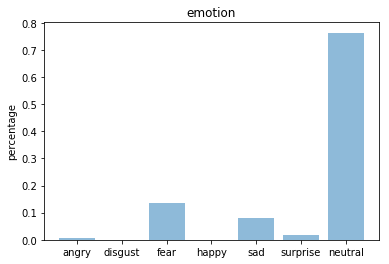

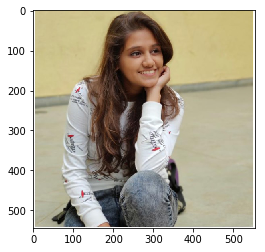

In [46]:

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'tattu.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()